# **Data Project Pt. 2: Exploratory Data Analysis & Creating Visualizations**

In this notebook, I'll be conducting an exploratory data analysis and creating visualizations for purposes of analysis and to showcase important features of the dataset. Visualizations and images used are in the project src folder.

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from stop_words import get_stop_words
import scipy.stats as stats

In [2]:
# importing datasets from saved JSON files
entire_series = pd.read_json('src/NGE_entire_series.json')
by_episode = pd.read_json('src/NGE_by_episode.json')

by_episode is currently filled with None values where there is no line data (episodes where the character doesn't appear).
replacing None values with the proper empty/zero values will avoid future type errors.

In [3]:
by_episode = by_episode.where(~by_episode.isnull(), {'Lines': [], 'Line Count': 0, 'Word Count': 0})
by_episode.head(3)

1   \
          {'Lines': ['#The Traffic panel shows "Tokyo-3:...   
Aircraft  {'Lines': ['Aircraft: Ah!  '], 'Line Count': 1...   
Announce  {'Lines': ['Announce: The gate is closing. Att...   

                                                         2   \
          {'Lines': ['#The cover of the report says:    ...   
Aircraft    {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Announce    {'Lines': [], 'Line Count': 0, 'Word Count': 0}   

                                                         3   \
          {'Lines': ['#JAPANESE GREETING LESSON: We alwa...   
Aircraft    {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Announce    {'Lines': [], 'Line Count': 0, 'Word Count': 0}   

                                                       4   \
          {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Aircraft  {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Announce  {'Lines': [], 'Line Count': 0, 'Word Count': 0}   

                                                       5   \
          {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Aircraft  {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Announce  {'Lines': [], 'Line Count': 0, 'Word Count': 0}   

                                                         6   \
            {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Aircraft    {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Announce  {'Lines': ['Announce:Enemy's particle accelera...   

                                                         7   \
            {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Aircraft    {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Announce  {'Lines': ['Announce: Unit One has cleared the...   

                                                       8   \
          {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Aircraft  {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Announce  {'Lines': [], 'Line Count': 0, 'Word Count': 0}   

                                                       9   \
          {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Aircraft  {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Announce  {'Lines': [], 'Line Count': 0, 'Word Count': 0}   

                                                       10  ...  \
          {'Lines': [], 'Line Count': 0, 'Word Count': 0}  ...   
Aircraft  {'Lines': [], 'Line Count': 0, 'Word Count': 0}  ...   
Announce  {'Lines': [], 'Line Count': 0, 'Word Count': 0}  ...   

                                                         17  \
            {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Aircraft    {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Announce  {'Lines': ['Announce: The transformation of th...   

                                                       18  \
          {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Aircraft  {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Announce  {'Lines': [], 'Line Count': 0, 'Word Count': 0}   

                                                         19  \
            {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Aircraft    {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Announce  {'Lines': ['Announce: Right now, the emergency...   

                                                       20  \
          {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Aircraft  {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Announce  {'Lines': [], 'Line Count': 0, 'Word Count': 0}   

                                                       21  \
          {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Aircraft  {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Announce  {'Lines': [], 'Line Count': 0, 'Word Count': 0}   

                                                         22  \
            {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Aircraft    {'Lines': [], 'Line Count': 0, 'Word Count': 0}   
Announce  {'Lines': ['Announce : Medical Staff meeting f...   

                                                     

## Adding in character popularity ranking data

For some additional analysis, I found a character popularity poll with data from 1997. There are many more recent and easily accessible popularity polls, but due to new media coming out between then and now, and this dataset only pulling from the original TV series, it seemed more accurate to look for historical data.

In [4]:
data = {'Name': ['Asuka','Kaoru','Shinji','Misato','Rei','Maya','Ryoji','Gendo','Ritsuko','Pen Pen'],
        'Ranking': [1,2,3,4,5,6,7,8,9,10],
        'Votes': [6074,5741,5270,4813,4794,3236,3060,2112,1675,927]}

character_popularity = pd.DataFrame(data)
# character_popularity.set_index('Name',inplace=True)

character_popularity

fig = px.bar(character_popularity, x='Name', y='Votes',color='Name',title='Character Ranking Poll Votes')

fig.update_layout(
    title={
        'text': "Character Popularity Poll Results",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title='',
    yaxis_title='# of Votes',
    template='plotly',
    showlegend=False)

# fig.write_image("src/plots/character_rankings.png")

In [5]:
# defining functions to help with plotting line and wordcount data

def char_lines(name):
    """Returns a list with the number of lines for a given character for every episode"""
    result = []
    for i in range(1,27):
        result.append(by_episode.loc[name][i]['Line Count'])
    return result

def char_words(name):
    """Returns a list with the number of words for a given character for every episode"""
    result = []
    for i in range(1,27):
        result.append(by_episode.loc[name][i]['Word Count'])
    return result

In [6]:
# building word count plot
fig = go.Figure()

# list of characters to plot
character_list = ['Rei','Asuka','Shinji','Misato','Kaoru']

# function takes a list of character names and adds a trace to a plotly graph object to plot multiple characters in one function
def add_traces(namelist):
    for name in namelist:
        fig.add_trace(
            go.Scatter(x=list(by_episode.columns), y=char_words(name), name=name, mode='lines')
        )

# adding character data to graph
add_traces(character_list)

fig.update_layout(
    title={
        'text': "Character Word Count by Episode",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Episode #",
    yaxis_title="Word Count",
    xaxis = dict(
    tickmode = 'linear',
    range=[.75, 26.25]),
    legend_title="Name",
    font=dict(
        family="Arial, monospace",
        size=14,
    )
)

fig.update_layout(template='plotly')
# fig.write_image("src/plots/character_wordcount_by_episode.png")

In [7]:
# building the line count plot

fig = go.Figure()

# list of characters to plot
character_list = ['Rei','Asuka','Shinji','Misato','Kaoru']

# this function takes a list of character names and adds a trace to a plotly graph object to plot multiple characters in one function
def add_traces(namelist):
    for name in namelist:
        fig.add_trace(
            go.Scatter(x=list(by_episode.columns), y=char_lines(name), name=name, mode='lines')
        )

# adding character data to graph
add_traces(character_list)

fig.update_layout(
    title={
        'text': "Character Line Count by Episode",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Episode #",
    yaxis_title="Line Count",
    xaxis = dict(
    tickmode = 'linear',
    range=[.75, 26.25]),
    legend_title="Name",
    font=dict(
        family="Arial, monospace",
        size=14,
    )
)

fig.update_layout(template='plotly')
# fig.write_image("src/plots/character_linecount_by_episode.png")

## Entire Series dataset - feature engineering

Now I'm going to add a couple new variables out of current ones for some basic feature engineering to look for any potential relationships.

In [8]:
# Average Line Length: entire series wordcount divided by linecount by character
entire_series['Avg Line Length'] = round(entire_series['Wordcount'] / entire_series['Linecount'],2)

data1 = pd.DataFrame(data)
data1.set_index('Name',inplace=True)

# merging the webscrape dataframe and popularity data, where popularity data is available (the top 10 ranked characters)
entire_series = entire_series.merge(data1, left_index=True, right_index=True, how='left')

# # adding in the 10th most popular character (who has no lines)
entire_series.loc['Pen Pen'] = {'Lines': ['n/a'], 'Linecount': 0, 'Wordcount': 0, 'Avg Line Length': 0, 'Ranking': 10, 'Votes': 927}
entire_series.sort_values(by='Wordcount',ascending=False, inplace=True)
entire_series.sort_values(by='Ranking', inplace=True)

In [9]:
# Speaking Episodes: # of episodes where the character speaks at least 1 line

# dataframe where no lines equals 1, and and any other value equals 0, for summing up the characters speaking episodes
nones = by_episode.where(by_episode.values == {'Lines': [], 'Line Count': 0, 'Word Count': 0}, 1)
nones = nones.where(nones.values != {'Lines': [], 'Line Count': 0, 'Word Count': 0}, 0)

list_ = []
for index in entire_series.index:
    # Pen Pen as a key throws an error because he has no speaking lines
    if index != 'Pen Pen':
        list_.append(sum(nones.loc[index]))
    else:
        list_.append(0)

entire_series['Speaking Episodes'] = list_

entire_series.head(12)

Lines  Linecount  \
Asuka      [Asuka:  So, which is the much-discussed Third...        173   
Kaoru      [Kaoru:          You are, the First Children? ...         17   
Shinji     [Shinji: Out of order ... I shouldn't have com...        235   
Misato     [Misato: Why, of all times, have I missed him ...        355   
Rei        [Rei: An emergency call ...... I'll go first ....         59   
Maya       [Maya: All values of the harmonics are normal....         57   
Ryoji      [Ryoji: Hey! Just a moment!  , Ryoji: Akagi go...         64   
Gendo      [Gendo: Normal weapons have no effect on Angel...         85   
Ritsuko    [Ritsuko: I'm dumbfound. She must have got los...        214   
Pen Pen                                                [n/a]          0   
Fuyutsuki  [Fuyutsuki: The next invasion is a matter of t...         70   
Kensuke    [Kensuke: What, Class Rep?  , Kensuke: That ca...         53   

           Wordcount  Avg Line Length  Ranking   Votes  Speaking Episodes  
Asuka           3202            18.51      1.0  6074.0                 18  
Kaoru            402            23.65      2.0  5741.0                  1  
Shinji          3790            16.13      3.0  5270.0                 23  
Misato          6249            17.60      4.0  4813.0                 26  
Rei              970            16.44      5.0  4794.0                 14  
Maya             822            14.42      6.0  3236.0                 19  
Ryoji           1195            18.67      7.0  3060.0                  2  
Gendo           1396            16.42      8.0  2112.0                  6  
Ritsuko         4087            19.10      9.0  1675.0                 24  
Pen Pen            0             0.00     10.0   927.0                  0  
Fuyutsuki       1209            17.27      NaN     NaN                  8  
Kensuke         1078            20.34      NaN     NaN                 14

In [10]:
fig = px.bar(entire_series.head(10), x=entire_series.head(10).index, text='Ranking',
             y='Wordcount',color='Ranking', color_continuous_scale=px.colors.sequential.Bluered_r)

fig.update_layout(
    title={
        'text': "Character Rankings & Wordcount",
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title='',
    yaxis_title='Total word count',
    template='plotly')

fig.update(layout_coloraxis_showscale=False)
fig.update_traces(textfont_size=12, textposition="outside")

fig.show()
# fig.write_image("src/plots/character_rankings_wordcount.png")

In [11]:
entire_series.corr(numeric_only=True)

Linecount  Wordcount  Avg Line Length   Ranking     Votes  \
Linecount           1.000000   0.996197        -0.003312 -0.290405  0.295782   
Wordcount           0.996197   1.000000         0.026436 -0.275631  0.279370   
Avg Line Length    -0.003312   0.026436         1.000000 -0.582052  0.599820   
Ranking            -0.290405  -0.275631        -0.582052  1.000000 -0.985591   
Votes               0.295782   0.279370         0.599820 -0.985591  1.000000   
Speaking Episodes   0.882391   0.872921        -0.008173 -0.275574  0.286171   

                   Speaking Episodes  
Linecount                   0.882391  
Wordcount                   0.872921  
Avg Line Length            -0.008173  
Ranking                    -0.275574  
Votes                       0.286171  
Speaking Episodes           1.000000

No real correlation between word count, average line length and popularity ranking. The only real correlations seen are in the obvious relationships such as linecount and wordcount, and votes with ranking. Not even the number of episodes the character speaks/appears in really correlates with their popularity.

This is because so many other factors go into a character's popularity, such as their design, personality, role in the story, how outgoing they are - some of these are likely correlated with how many lines/words they speak in the series but can't be analyzed just from these variables. Characters like Kaoru and Pen Pen affect the data because Kaoru appears in only 1 episode but has a significant impact on Shinji and so has few total lines, and Pen Pen is a pet penguin.

## By Episode dataset - Adding in episode ratings and wordcounts

In [12]:
# adding in a word count value for each episode
ep_total_word_counts = {}

for i in range(1,27):
    total_word_counts = []
    for key in by_episode[i]:
        total_word_counts.append(key['Word Count'])
    ep_total_word_counts[i] = sum(total_word_counts)
            
by_episode.loc['Total Word Counts'] = ep_total_word_counts

# adding in episode rankings from IMDB
episode_ratings = [7.7, 8.0, 7.7, 7.6, 7.7, 8.3, 7.5, 7.8, 8.1, 7.4, 7.9, 7.9, 7.6, 7.0, 8.1, 8.8, 7.6, 8.9, 9.2, 8.6, 8.6, 8.6, 8.6, 8.6, 7.8, 8.0]
by_episode.loc['Rating'] = episode_ratings

In [13]:
fig = px.scatter(x=list(by_episode.columns),y=by_episode.loc['Rating'],trendline ='ols',trendline_color_override="red")

fig.update_traces(marker=dict(size=7))

fig.add_trace(go.Scatter(x=list(by_episode.columns),y=by_episode.loc['Rating'],
                    mode='lines',
                    showlegend=False,
                         line_color='#636EFA'))

fig.update_layout(
    title={
        'text': "Show Rating by Episode (+ Trendline)",
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title='Episode #',
    yaxis_title='Rating',
    xaxis = dict(
        tickmode = 'linear',
        range=[.75, 26.25]),
    template='plotly')

# fig.write_image("src/plots/show_rating_by_episode.png")

In [14]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=list(by_episode.columns),y=by_episode.loc['Rating'], name="Episode Rating"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=list(by_episode.columns),y=by_episode.loc['Total Word Counts'], name="Episode Word Count"),
    secondary_y=True,
)


# Set y-axes titles
fig.update_yaxes(title_text="Word Count", secondary_y=False,color='blue')
fig.update_yaxes(title_text="Word Count", secondary_y=True,color='red')

fig.update_layout(
    title={
        'text': "Show Rating & Wordcount by Episode",
        'y':.88,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title='Episode #',
    yaxis_title='Rating',
    xaxis = dict(
        tickmode = 'linear',
        range=[.75, 26.25]),
    width=800,
    template='plotly')

fig.update_xaxes(tickangle=0)

# fig.write_image("src/plots/show_rating_wordcount.png")

In [15]:
corr, pval=stats.pearsonr(by_episode.T['Rating'],by_episode.T['Total Word Counts'])
corr, pval

(0.118832136256235, 0.5631411529484844)

There doesn't appear to be a strong or statistically significant correlation between the word count of an episode and its IMDB rating. I thought that it was possible that a higher wordcount implies an episode with more dialogue and exposition and a lower wordcount would be correlated with more action, which may be correlated with episode rating. However, this relationship is not shown in the data.

## Finding most popular words spoken by each character

More of a fun visualization - I wanted to show each character's most frequent words, as done in The Office data viz, but then I thought learning how to create the data and plot it in a wordcloud would be a good challenge and way to visually represent each character.

In [16]:
stop = get_stop_words('english')

def char_word_frequency(name, numwords):
    """Given a character name and number of words to return, returns a named series of their n most frequently used words"""
    word_dict = {}
    for line in entire_series.loc[name]['Lines']:
        # standardizing words by removing trailing or leading punctuation, and standardizing capitalization to lowercase
        for word in line.translate({ord(i): None for i in '!()-[]{};:"\,<>./?@#$%^&*_~'}).lower().split():
            if word in word_dict:
                word_dict[word] += 1
            else:
                word_dict[word] = 1
    # filtering out addiional stop words
    filtered_words = [[word,key] for word,key in word_dict.items() if word not in stop]
    # converting to dictionary then series
    dictionary = {}
    for item in filtered_words:
        dictionary[item[0]] = item[1]
    df = pd.Series(dictionary, name = name)
    return df.sort_values(ascending=False).head(numwords+1)[1:numwords+1]

In [17]:
# Character most frequent words in series format
print(char_word_frequency('Shinji', 10))
print()
print(char_word_frequency('Asuka', 10))
print()
print(char_word_frequency('Misato', 10))

father     32
nothing    23
move       22
away       20
like       19
enemy      19
eva        18
ayanami    17
pilot      15
people     14
Name: Shinji, dtype: int64

shinji     21
oh         17
must       17
nothing    14
come       14
one        14
like       13
live       12
will       12
idiot      10
Name: Asuka, dtype: int64

will         37
shinjikun    31
unit         28
one          23
eva          22
yes          22
time         22
must         21
know         20
father       18
Name: Misato, dtype: int64


In [18]:
def to_string(series):
    """converts series data to string parsable by wordcloud. Example: if a character says the word 'yes' 5 times total
    throughout the series, this function takes that series item and expands it to the string 'yes yes yes yes yes'"""
    list_ = [(f'{a} ')*b for a,b in zip(list(series.index),list(series.values*10))]
    result = ''
    for item in list_:
        result += item
    return result

# additional stopwords for wordclouds
stopwords = set()
stopwords.update(['oh','must','thing','can','well','will','come','nothing','ryoji','one','like','red'])

def plot_char_word_cloud(name, wordcount, image):
    """takes a character to convert to a word cloud and an image to use as a mask,
       returns a word cloud with the shape and colors of the mask"""
    mask = np.array(Image.open(image))
    image_colors = ImageColorGenerator(mask)
    
    # creating wordcloud object
    wcloud = WordCloud(
                        stopwords=stopwords, 
                        background_color="black", 
                        mode="RGBA", 
                        mask=mask,
                        margin=0,
                        collocations = False,
                        min_font_size = 6
                        )
    
    text = to_string(char_word_frequency(name,wordcount))
    wcloud.generate(text)
    wcloud.recolor(color_func = image_colors)
    
    # smoothing image result and saving to file. also removing white border
    plt.imshow(wcloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    # saves to image file - commented out
    # plt.savefig(f'src/character_word_clouds/{name}_cloud', bbox_inches='tight', pad_inches=0)

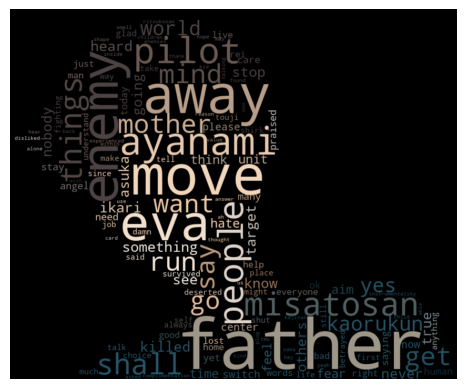

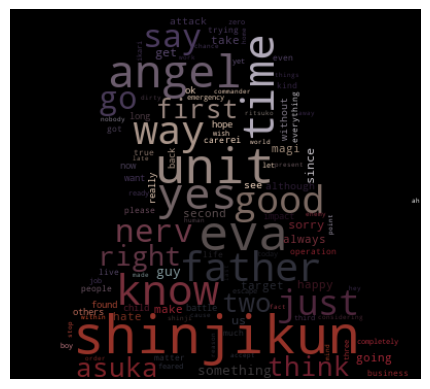

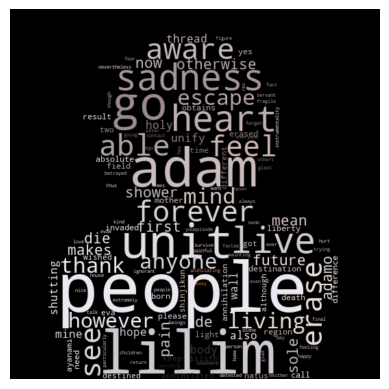

In [19]:
# plotting character word clouds for the top 5 most popular characters

plot_char_word_cloud('Shinji', 150, 'src/character_masks/shinjimask.png')
plot_char_word_cloud('Asuka', 150, 'src/character_masks/asukamask.jpg')
plot_char_word_cloud('Rei', 150, 'src/character_masks/reimask.png')
plot_char_word_cloud('Misato', 150, 'src/character_masks/misatomask.png')
plot_char_word_cloud('Kaoru', 150, 'src/character_masks/kaworumask.png')

The final visualizations! Of course these will make more sense to someone who's seen the show before, but overall I think these visualizations do a good job of capturing each characters motivations and interests at a glance.